# 电影评论分类：二分类问题

In [1]:
from keras.datasets import imdb

num_words=10000的意思是仅保留训练数据中前10000个最常出现的单词，低频词汇会被舍弃。

In [2]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to 

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_label[0]

1

In [7]:
max(max(x) for x in train_data)

9999

In [8]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

将文本转为张量的方法：
1. 填充列表：使其具有相同的长度，再将列表转换成形状为(samples, word_indeices)的整数张量，然后网络第一层使用能处理这种整数张量的层。
2. 对列表进行one-hot编码：将其转换为0和1组成的向量，举例序列[3, 5]会被转换为10000维向量，其中只有索引3和5为1，其余元素都为0。网络第一层可以用Dense层，他可以处理浮点数向量数据。

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
    return result

In [14]:
train_x = vectorize_sequences(train_data)
train_x

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [25]:
test_x = vectorize_sequences(test_data)
train_y = np.asarray(train_label).astype('float32')
train_y

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [26]:
test_y = np.asarray(test_label).astype('float32')
test_y

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

# 构建网络

In [17]:
from keras import models
from keras import layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
val_x = train_x[:10000]
partial_x = train_x[10000:]
val_y = train_y[:10000]
partial_y = train_y[10000:]

In [28]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x, partial_y, epochs=20, batch_size=512, validation_data=(val_x, val_y))

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.6134 - acc: 0.7002 - val_loss: 0.4172 - val_acc: 0.8688
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3535 - acc: 0.8985 - val_loss: 0.3234 - val_acc: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2492 - acc: 0.9242 - val_loss: 0.2817 - val_acc: 0.8924
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1952 - acc: 0.9383 - val_loss: 0.2723 - val_acc: 0.8922
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1550 - acc: 0.9521 - val_loss: 0.2799 - val_acc: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1223 - acc: 0.9623 - val_loss: 0.2869 - val_acc: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1074 - acc: 0.9676 - val_loss: 0.3161 - val_acc: 0.8833
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0891 - a

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# 绘制训练损失和验证损失

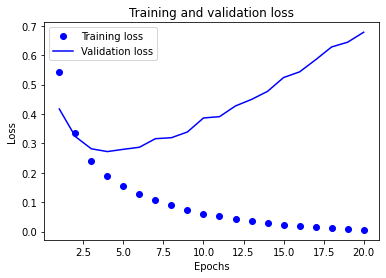

In [31]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo'表示蓝色圆点
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b'表示蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

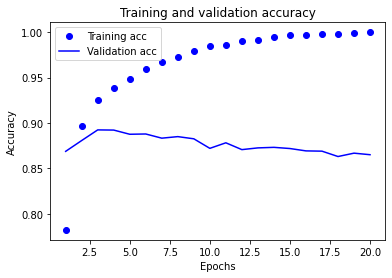

In [32]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

训练损失每一轮都在降低，训练精度每一轮都在提升，这就是梯度下降优化的结果。  
但验证损失和验证精度并非如此，似乎在第五轮之后开始显著下降，也就是过拟合(overfit)  

# 从头开始重新训练一个模型

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_x, train_y, epochs=4, batch_size=512)
result = model.evaluate(test_x, test_y)

Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.5787 - accuracy: 0.7452
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.3001 - accuracy: 0.9077
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2150 - accuracy: 0.9259
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2918 - accuracy: 0.8844


In [35]:
result

[0.2917605936527252, 0.8844000101089478]

In [36]:
model.predict(test_x)

array([[0.2643562 ],
       [0.9996511 ],
       [0.9399786 ],
       ...,
       [0.13657588],
       [0.12650692],
       [0.755746  ]], dtype=float32)

# 新闻多分类任务

In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])  # 减去3是因为0、1、2为padding、start of sequence、unknown

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# 将标签向量化为one-hot形式编码
def to_one_hot(labels, dimensions=46):
    result = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        result[i, label] = 1
    return result

one_hot_train_labels = to_one_hot(train_label)
one_hot_test_labels = to_one_hot(test_label)

In [9]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_label)
one_hot_test_labels = to_categorical(test_label)

## 构建模型

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
x_val = x_train[:1000]  # 验证集data
partial_x_train = x_train[1000:]  # 训练集data

y_val = one_hot_train_labels[:1000]  # 验证集label
partial_y_train = one_hot_train_labels[1000:]  # 训练集label

In [12]:
print(x_val.shape)
print(partial_x_train.shape)

print(y_val.shape)
print(partial_y_train.shape)

(1000, 10000)
(7982, 10000)
(1000, 46)
(7982, 46)


In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 73ms/step - loss: 3.2247 - accuracy: 0.3602 - val_loss: 1.8038 - val_accuracy: 0.6600
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.5549 - accuracy: 0.6998 - val_loss: 1.3158 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.1055 - accuracy: 0.7675 - val_loss: 1.1513 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8751 - accuracy: 0.8124 - val_loss: 1.0438 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6820 - accuracy: 0.8581 - val_loss: 0.9777 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5447 - accuracy: 0.8870 - val_loss: 0.9239 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 30ms/step - loss: 0.4325 - accuracy: 0.9127 - val_loss: 0.8822 - val_accuracy: 0.8160
Epoch 8/20
16

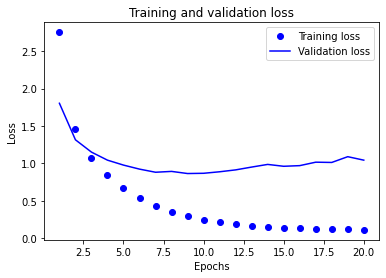

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

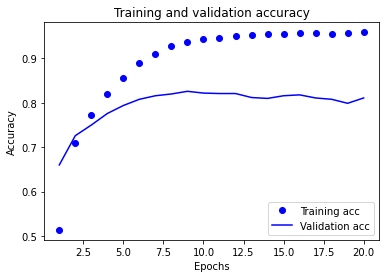

In [18]:
# 精度
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

搞一个新模型

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 48ms/step - loss: 3.2179 - accuracy: 0.3694 - val_loss: 1.7818 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 0s 31ms/step - loss: 1.5303 - accuracy: 0.7031 - val_loss: 1.2878 - val_accuracy: 0.7300
Epoch 3/9
16/16 [==============================] - 1s 40ms/step - loss: 1.0759 - accuracy: 0.7757 - val_loss: 1.1084 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 1s 33ms/step - loss: 0.7906 - accuracy: 0.8319 - val_loss: 1.0194 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 1s 32ms/step - loss: 0.6405 - accuracy: 0.8625 - val_loss: 0.9537 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 31ms/step - loss: 0.5068 - accuracy: 0.8955 - val_loss: 0.9208 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 36ms/step - loss: 0.4253 - accuracy: 0.9139 - val_loss: 0.9062 - val_accuracy: 0.8070
Epoch 8/9
16/16 [===

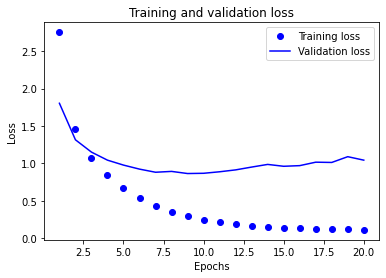

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

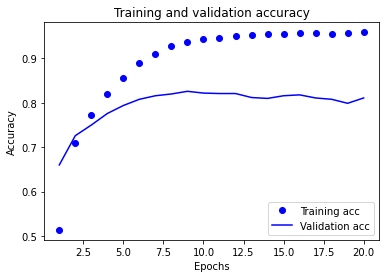

In [22]:
# 精度
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.7841


In [25]:
results

[1.0000380277633667, 0.784060537815094]

可以得到约80%的精度

在新数据上生成预测结果

In [27]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

0.9999998

In [30]:
np.argmax(predictions[0])

3